In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# lets load up the data, keep in mind the the unzipped version is not in the repo
df = pd.read_csv('course_ratings.csv')

In [4]:
# lets a look and see what we are working with

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175347 entries, 0 to 175346
Data columns (total 7 columns):
user           175347 non-null object
course         175347 non-null object
category       175347 non-null object
rating         175347 non-null float64
job            175347 non-null object
institution    175347 non-null object
state          175347 non-null object
dtypes: float64(1), object(6)
memory usage: 9.4+ MB
None


In [5]:
print(df.head())

                                                user  \
0  f18c20ed7945edb779041249a71b3a54a29442c56ca2cd...   
1  f18c20ed7945edb779041249a71b3a54a29442c56ca2cd...   
2  f18c20ed7945edb779041249a71b3a54a29442c56ca2cd...   
3  f18c20ed7945edb779041249a71b3a54a29442c56ca2cd...   
4  84135d7d6e875312557ad408b827db1476511d7d1e1895...   

                                              course  \
0  bd493d60ac1cfa834fd7c0b46f56e5851a53b55565d5f5...   
1  17c186cde47f63e9644ec5b8bc807770d7fe5d27e629fa...   
2  3157346cfe43be353b8e12b5bdcd82b4479527c595bca3...   
3  3bb8a1bf440c92da0839fdc550c2f2b1729ef626f5d077...   
4  f18c20ed7945edb779041249a71b3a54a29442c56ca2cd...   

                                            category  rating  \
0  884327c7b57992580657deec4be99eb94b9db6e9a8a959...    4.68   
1  373687fd32764d49c3d7dcef01176ffa98d72d0e795e24...    4.59   
2  884327c7b57992580657deec4be99eb94b9db6e9a8a959...    4.73   
3  884327c7b57992580657deec4be99eb94b9db6e9a8a959...    4.64   
4  290

(array([7.78000e+02, 1.28440e+04, 1.01158e+05, 6.05640e+04, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.91 ,  2.064,  3.218,  4.372,  5.526,  6.68 ,  7.834,  8.988,
        10.142, 11.296, 12.45 ]),
 <a list of 10 Patch objects>)

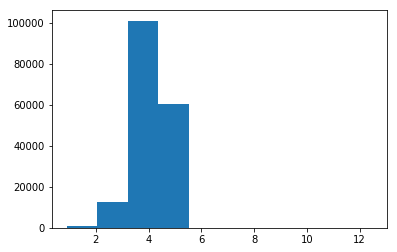

In [6]:
plt.hist(df['rating'])

In [7]:
print(df.columns)

Index(['user', 'course', 'category', 'rating', 'job', 'institution', 'state'], dtype='object')


In [25]:
features = ['user','course','category','job','institution','state']
onehot= ['category','job','institution','state']

# lets create contiguous features

for f in features:
    uniq = df[f].unique()
    feature2idx = {o:i for i,o in enumerate(uniq)}
    df[f] = df[f].apply(lambda x: feature2idx[x])

# one hot encode
for oh in onehot:
    df[oh] = pd.Categorical(df[oh])
    dfDummies = pd.get_dummies(df[oh], prefix = oh)
    df = pd.concat([df, dfDummies], axis=1)
    df = df.drop([oh],axis=1)

In [28]:
print(df.columns)
#df.to_csv('final.csv',index=False)

Index(['user', 'course', 'rating', 'category_0', 'category_1', 'category_2',
       'category_3', 'category_4', 'category_5', 'category_6',
       ...
       'state_50', 'state_51', 'state_52', 'state_53', 'state_54', 'state_55',
       'state_56', 'state_57', 'state_58', 'state_59'],
      dtype='object', length=137)


In [31]:
print(df.describe())
print(df.info())

                user         course         rating     category_0  \
count  175347.000000  175347.000000  175347.000000  175347.000000   
mean    22915.186562      53.892214       4.030533       0.586317   
std     15430.277956      42.283370       0.571618       0.492494   
min         0.000000       0.000000       0.910000       0.000000   
25%      8823.000000      24.000000       3.690000       0.000000   
50%     21662.000000      41.000000       4.000000       1.000000   
75%     36467.500000      79.000000       4.590000       1.000000   
max     52117.000000     218.000000      12.450000       1.000000   

          category_1     category_2     category_3     category_4  \
count  175347.000000  175347.000000  175347.000000  175347.000000   
mean        0.006650       0.000023       0.099956       0.004984   
std         0.081274       0.004776       0.299942       0.070424   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [34]:
dfraw = pd.read_csv('course_ratings.csv')
print(dfraw['category'].nunique())
print(dfraw['course'].nunique())

14
219
